### Analytical model vs Booskim2 comparison script

In [152]:
import numpy as np
import pandas as pd
import os 
import sys
import itertools
import time
import matplotlib.pyplot as plt

In [5]:
"""
Concatenate CSV files from different experiments into two master files.
Skips files that only contain headers (no data rows).
"""

# Define the directory
data_dir = '../data/light_noc_comp_2'

# Define the file prefixes in order
prefixes = ['p1', 'p2', 'p3_1', 'p3_2', 'p3_3', 'p3_4',
            'p4_1', 'p4_2', 'p4_3', 'p4_4',
            'p5_1', 'p5_2', 'p5_3', 'p5_4', 'p5_5', 'p5_6', 'p5_7',
            'p6', 'p7']

# File types to concatenate
file_types = [
    ('latency_energy_results', 'Latency_energy_results_ResNet32_early_blocks_12x12.csv'),
    ('noc_comparison_results', 'Noc_comparison_results_ResNet32_early_blocks_12x12.csv')
]

for file_type, output_name in file_types:
    print(f"\n{'='*80}")
    print(f"Processing: {file_type}")
    print(f"{'='*80}")
    
    all_dfs = []
    
    for prefix in prefixes:
        # Try both possible filename patterns
        filename = f"{prefix}_{file_type}_ResNet32_early_blocks_12x12.csv"
        filepath = os.path.join(data_dir, filename)
        
        if os.path.exists(filepath):
            # Read the file
            try:
                df = pd.read_csv(filepath)
                
                # Check if file has data (more than just header)
                if len(df) > 0:
                    all_dfs.append(df)
                    print(f"✓ {filename}: {len(df)} rows")
                else:
                    print(f"○ {filename}: EMPTY (header only) - SKIPPED")
                    
            except Exception as e:
                print(f"✗ {filename}: ERROR - {e}")
        else:
            print(f"✗ {filename}: NOT FOUND")
    
    # Concatenate all dataframes
    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
        output_path = os.path.join(data_dir, output_name)
        combined_df.to_csv(output_path, index=False)
        print(f"\n✓ Saved {output_name}: {len(combined_df)} total rows")
        print(f"  Columns: {list(combined_df.columns)}")
    else:
        print(f"\n✗ No data to combine for {file_type}")

print(f"\n{'='*80}")
print("Done!")
print(f"{'='*80}")


Processing: latency_energy_results
✓ p1_latency_energy_results_ResNet32_early_blocks_12x12.csv: 27 rows
✓ p2_latency_energy_results_ResNet32_early_blocks_12x12.csv: 18 rows
✓ p3_1_latency_energy_results_ResNet32_early_blocks_12x12.csv: 9 rows
✓ p3_2_latency_energy_results_ResNet32_early_blocks_12x12.csv: 4 rows
✓ p3_3_latency_energy_results_ResNet32_early_blocks_12x12.csv: 4 rows
✓ p3_4_latency_energy_results_ResNet32_early_blocks_12x12.csv: 3 rows
✓ p4_1_latency_energy_results_ResNet32_early_blocks_12x12.csv: 7 rows
✓ p4_2_latency_energy_results_ResNet32_early_blocks_12x12.csv: 4 rows
✓ p4_3_latency_energy_results_ResNet32_early_blocks_12x12.csv: 3 rows
✓ p4_4_latency_energy_results_ResNet32_early_blocks_12x12.csv: 2 rows
✓ p5_1_latency_energy_results_ResNet32_early_blocks_12x12.csv: 6 rows
✓ p5_2_latency_energy_results_ResNet32_early_blocks_12x12.csv: 5 rows
✓ p5_3_latency_energy_results_ResNet32_early_blocks_12x12.csv: 3 rows
✓ p5_4_latency_energy_results_ResNet32_early_blocks_12x1

In [68]:
# data analysis script for 8x8 ResNet32 early blocks

data_path_noc_comp = '../data/light_noc_comp/Noc_comparison_results_ResNet32_early_blocks_8x8_corrected.csv'
data_energy = '../data/light_noc_comp/Latency_energy_results_ResNet32_early_blocks_8x8.csv'

In [69]:
# Load NoC comparison data
df_noc = pd.read_csv(data_path_noc_comp)

print(f"Total configurations: {len(df_noc)}")
print(f"\nColumns: {list(df_noc.columns)}\n")

# Sort by result_booksim (latency) - smallest first
df_sorted = df_noc.sort_values('result_booksim', ascending=True)

# Get top 5 best performing partitions
top5 = df_sorted.head(5)

print("="*80)
print("TOP 5 BEST PERFORMING PARTITIONS (by lowest Booksim2 latency)")
print("="*80)

for idx, row in top5.iterrows():
    print(f"\n{'Rank '}{list(top5.index).index(idx) + 1}:")
    print(f"  Partitioner Config: {row['partitioner_config']}")
    print(f"  Parts per Layer: {row['parts_per_layer']}")
    print(f"  Total Partitions: {row['num_partitions']}")
    print(f"  Booksim2 Latency: {row['result_booksim']:.0f} cycles")
    print(f"  Analytical Latency: {row['result_analytical']:.0f} cycles")
    print(f"  Difference: {row['percentage_diff']:.2f}%")
    print(f"  Time Gain: {row['time_gain']:.2f}x")

# Create a summary table
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)
display(top5[['partitioner_config', 'parts_per_layer', 'num_partitions', 
              'result_booksim', 'result_analytical', 'percentage_diff']])

Total configurations: 102

Columns: ['num_partitions', 'parts_per_layer', 'result_analytical', 'result_booksim', 'percentage_diff', 'analytical_time', 'booksim_time', 'time_gain', 'partitioner_config']

TOP 5 BEST PERFORMING PARTITIONS (by lowest Booksim2 latency)

Rank 1:
  Partitioner Config: (5, 2, 1)
  Parts per Layer: 64
  Total Partitions: 1729
  Booksim2 Latency: 248549 cycles
  Analytical Latency: 194369 cycles
  Difference: 21.80%
  Time Gain: 37.14x

Rank 2:
  Partitioner Config: (5, 2, 3)
  Parts per Layer: 192
  Total Partitions: 5185
  Booksim2 Latency: 282810 cycles
  Analytical Latency: 205980 cycles
  Difference: 27.17%
  Time Gain: 54.97x

Rank 3:
  Partitioner Config: (5, 2, 2)
  Parts per Layer: 128
  Total Partitions: 3457
  Booksim2 Latency: 285359 cycles
  Analytical Latency: 203596 cycles
  Difference: 28.65%
  Time Gain: 153.58x

Rank 4:
  Partitioner Config: (4, 1, 4)
  Parts per Layer: 64
  Total Partitions: 1729
  Booksim2 Latency: 285532 cycles
  Analytical 

,partitioner_config,parts_per_layer,num_partitions,result_booksim,result_analytical,percentage_diff
98,"(5, 2, 1)",64,1729,248549,194369,21.80
100,"(5, 2, 3)",192,5185,282810,205980,27.17
99,"(5, 2, 2)",128,3457,285359,203596,28.65
80,"(4, 1, 4)",64,1729,285532,227783,20.23
86,"(4, 2, 4)",128,3457,302098,229705,23.96


### Visualization of NoC comparison results

In [80]:
def plot_noc_comparison_ieee(csv_path, figsize=(3.5, 2.5), save_path=None, dpi=300):
    """
    Create IEEE conference paper style plot (2-column format) for NoC comparison.
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file with NoC comparison results
    figsize : tuple
        Figure size in inches (default: 3.5x2.5 for IEEE 2-column)
    save_path : str, optional
        Path to save the figure (if None, only displays)
    dpi : int
        Resolution for saved figure (default: 300)
    
    Returns:
    --------
    fig, ax1, ax2 : matplotlib objects
    """
    
    # Set Helvetica font and IEEE style parameters
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'Arial'],
        'font.size': 8,
        'axes.labelsize': 9,
        'axes.titlesize': 9,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'legend.fontsize': 7,
        'figure.titlesize': 10,
        'axes.linewidth': 0.8,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.5,
        'lines.markersize': 4,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
    })
    
    # Read data
    df = pd.read_csv(csv_path)
    
    # For duplicate parts_per_layer, average the percentage_diff and time_gain
    df_averaged = df.groupby('parts_per_layer').agg({
        'percentage_diff': 'mean',
        'time_gain': 'mean',
        'num_partitions': 'first',  # Keep first value (should be same for duplicates)
        'parts_per_layer': 'first'
    }).reset_index(drop=True)
    
    # Sort by parts_per_layer for better visualization
    df_sorted = df_averaged.sort_values('parts_per_layer')
    
    print(f"Original data: {len(df)} rows")
    print(f"After averaging duplicates: {len(df_sorted)} rows")
    
    # Create figure with two y-axes
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    
    # Plot error (percentage_diff) on left y-axis
    color1 = '#1f77b4'  # Blue
    ax1.scatter(df_sorted['parts_per_layer'], df_sorted['percentage_diff'], 
                color=color1, marker='o', s=25, alpha=0.7, label='Error (%)', zorder=3)
    ax1.set_xlabel('Partitions per Layer', fontweight='normal')
    ax1.set_ylabel('Error (%)', fontweight='normal')  # No color
    ax1.tick_params(axis='y', direction='in')
    ax1.tick_params(axis='x', direction='in')
    
    # Add horizontal grid
    ax1.grid(True, axis='y', linestyle='--', alpha=0.3, zorder=0)
    
    # Create second y-axis for speedup with LOG SCALE
    ax2 = ax1.twinx()
    color2 = '#ff7f0e'  # Orange
    ax2.scatter(df_sorted['parts_per_layer'], df_sorted['time_gain'], 
                color=color2, marker='s', s=25, alpha=0.7, label='Speedup', zorder=3)
    ax2.set_ylabel('Speedup (×)', fontweight='normal')  # No color
    ax2.set_yscale('log')  # LOG SCALE for speedup
    ax2.tick_params(axis='y', direction='in')
    
    # Make top and right spines visible without ticks
    ax1.spines['top'].set_visible(True)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    
    # Remove ticks from top axis
    ax1.tick_params(top=False, labeltop=False)
    ax2.tick_params(top=False, labeltop=False)
    
    # Add combined legend - FULLY OPAQUE
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
              loc='lower right', frameon=True, framealpha=1.0, edgecolor='black', 
              fancybox=False, facecolor='white')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    return fig, ax1, ax2

Original data: 102 rows
After averaging duplicates: 23 rows
Figure saved to: ../data/noc_comparison_8x8.png


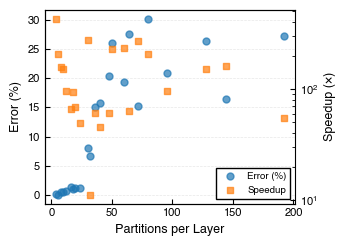


Dataset Statistics:
  Total configurations: 102
  Parts per layer range: 4 - 192
  Error range: 0.00% - 39.56%
  Speedup range: 1.24× - 678.96×
  Mean error: 11.59%
  Mean speedup: 103.67×


In [81]:
# Generate the plot
fig, ax1, ax2 = plot_noc_comparison_ieee(
    csv_path=data_path_noc_comp,
    figsize=(3.5, 2.5),  # IEEE 2-column width
    save_path='../data/noc_comparison_8x8.png',  # Optional: save as PDF
    dpi=500
)

plt.show()

# Print some statistics
df_stats = pd.read_csv(data_path_noc_comp)
print(f"\nDataset Statistics:")
print(f"  Total configurations: {len(df_stats)}")
print(f"  Parts per layer range: {df_stats['parts_per_layer'].min()} - {df_stats['parts_per_layer'].max()}")
print(f"  Error range: {df_stats['percentage_diff'].min():.2f}% - {df_stats['percentage_diff'].max():.2f}%")
print(f"  Speedup range: {df_stats['time_gain'].min():.2f}× - {df_stats['time_gain'].max():.2f}×")
print(f"  Mean error: {df_stats['percentage_diff'].mean():.2f}%")
print(f"  Mean speedup: {df_stats['time_gain'].mean():.2f}×")

In [82]:
data_path_noc_comp_12x12 = '../data/light_noc_comp_2/Noc_comparison_results_ResNet32_early_blocks_12x12_corrected.csv'

Original data: 103 rows
After averaging duplicates: 24 rows
Figure saved to: ../data/noc_comparison_12x12.png


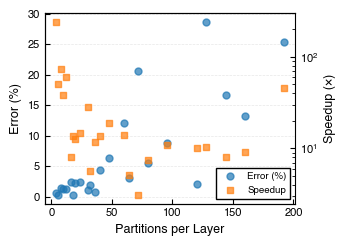


Dataset Statistics:
  Total configurations: 103
  Parts per layer range: 4 - 192
  Error range: 0.19% - 36.55%
  Speedup range: 1.65× - 322.75×
  Mean error: 5.56%
  Mean speedup: 26.17×


In [83]:
# Generate the plot
fig, ax1, ax2 = plot_noc_comparison_ieee(
    csv_path=data_path_noc_comp_12x12,
    figsize=(3.5, 2.5),  # IEEE 2-column width
    save_path='../data/noc_comparison_12x12.png',  # Optional: save as PDF
    dpi=500
)

plt.show()

# Print some statistics
df_stats = pd.read_csv(data_path_noc_comp_12x12)
print(f"\nDataset Statistics:")
print(f"  Total configurations: {len(df_stats)}")
print(f"  Parts per layer range: {df_stats['parts_per_layer'].min()} - {df_stats['parts_per_layer'].max()}")
print(f"  Error range: {df_stats['percentage_diff'].min():.2f}% - {df_stats['percentage_diff'].max():.2f}%")
print(f"  Speedup range: {df_stats['time_gain'].min():.2f}× - {df_stats['time_gain'].max():.2f}×")
print(f"  Mean error: {df_stats['percentage_diff'].mean():.2f}%")
print(f"  Mean speedup: {df_stats['time_gain'].mean():.2f}×")

### Latency and Energy breakdown plots

In [111]:
def plot_latency_breakdown_ieee(csv_path, figsize=(5.0, 2.5), save_path=None, dpi=300, min_parts_per_layer=None):
    """
    Create IEEE conference paper style bar plot for latency breakdown.
    
    Shows overall latency as full bars with data flow cycles overlaid on top
    to visualize the proportion of time spent on data communication.
    Note: comp_cycles and data_flow_cycles overlap, so they don't sum to overall_latency_cycles.
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file with latency/energy results
    figsize : tuple
        Figure size in inches (default: 5.0x2.5 for wider plot)
    save_path : str, optional
        Path to save the figure (if None, only displays)
    dpi : int
        Resolution for saved figure (default: 300)
    min_parts_per_layer : int, optional
        Minimum number of partitions per layer to include in plot (filters out smaller values)
    
    Returns:
    --------
    fig, ax : matplotlib objects
    """
    
    # Set Helvetica font and IEEE style parameters
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'Arial'],
        'font.size': 8,
        'axes.labelsize': 9,
        'axes.titlesize': 9,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'legend.fontsize': 7,
        'figure.titlesize': 10,
        'axes.linewidth': 0.8,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
    })
    
    # Read data
    df = pd.read_csv(csv_path)
    
    # For duplicate parts_per_layer, keep only the one with smallest overall_latency_cycles
    df_filtered = df.loc[df.groupby('parts_per_layer')['overall_latency_cycles'].idxmin()]
    
    # Apply minimum partitions filter if specified
    if min_parts_per_layer is not None:
        df_filtered = df_filtered[df_filtered['parts_per_layer'] >= min_parts_per_layer]
        print(f"Filtering: showing only parts_per_layer >= {min_parts_per_layer}")
    
    # Sort by parts_per_layer
    df_sorted = df_filtered.sort_values('parts_per_layer')
    
    print(f"Original data: {len(df)} rows")
    print(f"After filtering duplicates and applying min filter: {len(df_sorted)} rows")
    
    # Calculate data flow percentage
    df_sorted = df_sorted.copy()
    df_sorted['data_flow_percentage'] = (df_sorted['data_flow_cycles'] / 
                                         df_sorted['overall_latency_cycles'] * 100)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    
    x_positions = range(len(df_sorted))
    bar_width = 0.8
    
    # Colors
    color_overall = "#F76D55"  # Red for overall latency
    color_dataflow =  "#4A83EC" # Blue for data flow overlay
    
    # Plot overall latency as base bars
    bars1 = ax.bar(x_positions, df_sorted['overall_latency_cycles'], 
                   width=bar_width,
                   color=color_overall, label='Overall Latency', 
                   edgecolor='black', linewidth=0.5, zorder=2)
    
    # Overlay data flow cycles on top (starting from bottom)
    bars2 = ax.bar(x_positions, df_sorted['data_flow_cycles'], 
                   width=bar_width,
                   color=color_dataflow, label='Data Flow', 
                   edgecolor='black', linewidth=0.5, zorder=3,
                   alpha=0.85)  # Slight transparency to show it's an overlay
    
    # Set labels and formatting
    ax.set_xlabel('Partitions per Layer', fontweight='normal')
    ax.set_ylabel('Latency (cycles)', fontweight='normal')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df_sorted['parts_per_layer'].astype(int), rotation=0)
    
    # Add horizontal grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.3, zorder=0)
    ax.set_axisbelow(True)
    
    # Ticks inside
    ax.tick_params(axis='both', direction='in')
    
    # Make top spine visible without ticks
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.tick_params(top=False, right=False)
    
    # Add legend - fully opaque
    ax.legend(loc='best', frameon=True, framealpha=1.0, 
             edgecolor='black', fancybox=False, facecolor='white')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    # Print statistics
    print(f"\nLatency Statistics:")
    print(f"  Min overall latency: {df_sorted['overall_latency_cycles'].min():.0f} cycles")
    print(f"  Max overall latency: {df_sorted['overall_latency_cycles'].max():.0f} cycles")
    print(f"  Min data flow %: {df_sorted['data_flow_percentage'].min():.1f}%")
    print(f"  Max data flow %: {df_sorted['data_flow_percentage'].max():.1f}%")
    print(f"  Mean data flow %: {df_sorted['data_flow_percentage'].mean():.1f}%")
    print(f"\nData flow percentage trend (showing increasing communication overhead):")
    for idx, row in df_sorted.iterrows():
        print(f"  {int(row['parts_per_layer'])} parts/layer: {row['data_flow_percentage']:.1f}% data flow")
    
    return fig, ax

In [116]:
data_energy = '../data/light_noc_comp/Latency_energy_results_ResNet32_early_blocks_8x8.csv'
data_energy_12x12 = '../data/light_noc_comp_2/Latency_energy_results_ResNet32_early_blocks_12x12.csv'

Filtering: showing only parts_per_layer >= 10
Original data: 106 rows
After filtering duplicates and applying min filter: 20 rows
Figure saved to: ../data/latency_breakdown_8x8.png

Latency Statistics:
  Min overall latency: 248549 cycles
  Max overall latency: 1554909 cycles
  Min data flow %: 1.7%
  Max data flow %: 68.6%
  Mean data flow %: 25.0%

Data flow percentage trend (showing increasing communication overhead):
  10 parts/layer: 6.7% data flow
  12 parts/layer: 5.4% data flow
  16 parts/layer: 1.7% data flow
  18 parts/layer: 21.8% data flow
  20 parts/layer: 9.2% data flow
  24 parts/layer: 6.3% data flow
  30 parts/layer: 36.6% data flow
  32 parts/layer: 3.2% data flow
  36 parts/layer: 28.0% data flow
  40 parts/layer: 15.7% data flow
  48 parts/layer: 8.1% data flow
  50 parts/layer: 68.6% data flow
  60 parts/layer: 47.5% data flow
  64 parts/layer: 5.2% data flow
  72 parts/layer: 59.6% data flow
  80 parts/layer: 33.2% data flow
  96 parts/layer: 35.8% data flow
  128

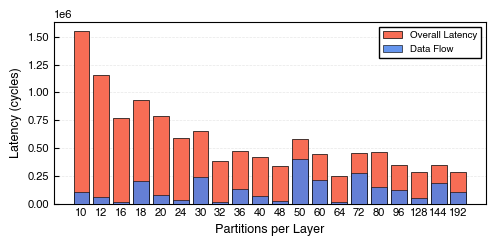

In [117]:
# Generate the latency breakdown bar plot
fig, ax = plot_latency_breakdown_ieee(
    csv_path=data_energy,
    figsize=(5.0, 2.5),  # Wider than the previous plot
    save_path='../data/latency_breakdown_8x8.png',
    dpi=800,
    min_parts_per_layer=10  # Only show results for 8+ partitions per layer
)

plt.show()

Filtering: showing only parts_per_layer >= 10
Original data: 108 rows
After filtering duplicates and applying min filter: 21 rows
Figure saved to: ../data/latency_breakdown_12x12.png

Latency Statistics:
  Min overall latency: 160826 cycles
  Max overall latency: 1559992 cycles
  Min data flow %: 3.3%
  Max data flow %: 70.2%
  Mean data flow %: 27.1%

Data flow percentage trend (showing increasing communication overhead):
  10 parts/layer: 6.8% data flow
  12 parts/layer: 3.3% data flow
  16 parts/layer: 3.7% data flow
  18 parts/layer: 25.3% data flow
  20 parts/layer: 10.8% data flow
  24 parts/layer: 5.8% data flow
  30 parts/layer: 43.6% data flow
  32 parts/layer: 5.6% data flow
  36 parts/layer: 26.8% data flow
  40 parts/layer: 13.3% data flow
  48 parts/layer: 9.7% data flow
  60 parts/layer: 50.3% data flow
  64 parts/layer: 11.2% data flow
  72 parts/layer: 39.9% data flow
  80 parts/layer: 17.5% data flow
  96 parts/layer: 22.7% data flow
  120 parts/layer: 70.2% data flow


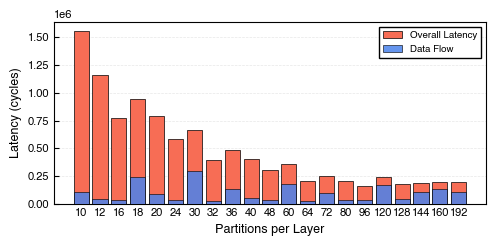

In [119]:
# Generate the latency breakdown bar plot
fig, ax = plot_latency_breakdown_ieee(
    csv_path=data_energy_12x12,
    figsize=(5.0, 2.5),  # Wider than the previous plot
    save_path='../data/latency_breakdown_12x12.png',
    dpi=800,
    min_parts_per_layer=10  # Only show results for 8+ partitions per layer
)

plt.show()

In [130]:
def plot_energy_breakdown_ieee(csv_path, figsize=(5.0, 2.5), save_path=None, dpi=300, min_parts_per_layer=None):
    """
    Create IEEE conference paper style stacked bar plot for energy breakdown.
    
    Shows total energy as stacked bars: PE energy + Data flow energy.
    Note: energy_PEs_uJ + energy_data_flow_uJ = total_energy_uJ
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file with latency/energy results
    figsize : tuple
        Figure size in inches (default: 5.0x2.5 for wider plot)
    save_path : str, optional
        Path to save the figure (if None, only displays)
    dpi : int
        Resolution for saved figure (default: 300)
    min_parts_per_layer : int, optional
        Minimum number of partitions per layer to include in plot (filters out smaller values)
    
    Returns:
    --------
    fig, ax : matplotlib objects
    """
    
    # Set Helvetica font and IEEE style parameters
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'Arial'],
        'font.size': 8,
        'axes.labelsize': 9,
        'axes.titlesize': 9,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'legend.fontsize': 7,
        'figure.titlesize': 10,
        'axes.linewidth': 0.8,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
    })
    
    # Read data
    df = pd.read_csv(csv_path)
    
    # For duplicate parts_per_layer, keep only the one with smallest overall_latency_cycles
    df_filtered = df.loc[df.groupby('parts_per_layer')['overall_latency_cycles'].idxmin()]
    
    # Apply minimum partitions filter if specified
    if min_parts_per_layer is not None:
        df_filtered = df_filtered[df_filtered['parts_per_layer'] >= min_parts_per_layer]
        print(f"Filtering: showing only parts_per_layer >= {min_parts_per_layer}")
    
    # Sort by parts_per_layer
    df_sorted = df_filtered.sort_values('parts_per_layer')
    
    print(f"Original data: {len(df)} rows")
    print(f"After filtering duplicates and applying min filter: {len(df_sorted)} rows")
    
    # Calculate data flow energy percentage
    df_sorted = df_sorted.copy()
    df_sorted['data_flow_energy_percentage'] = (df_sorted['energy_data_flow_uJ'] / 
                                                 df_sorted['total_energy_uJ'] * 100)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    
    x_positions = range(len(df_sorted))
    bar_width = 0.8
    
    # Colors - different from latency plot
    color_pe = "#46EA8A"  # Green for PE energy
    color_dataflow = '#9B59B6'  # Purple for data flow energy
    
    # Plot stacked bars
    # Bottom part: PE energy
    bars1 = ax.bar(x_positions, df_sorted['energy_PEs_uJ'], 
                   width=bar_width,
                   color=color_pe, label='PE Energy', 
                   edgecolor='black', linewidth=0.5, zorder=2)
    
    # Top part: Data flow energy
    bars2 = ax.bar(x_positions, df_sorted['energy_data_flow_uJ'], 
                   bottom=df_sorted['energy_PEs_uJ'],
                   width=bar_width,
                   color=color_dataflow, label='Data Flow Energy', 
                   edgecolor='black', linewidth=0.5, zorder=2)
    
    # Set labels and formatting
    ax.set_xlabel('Partitions per Layer', fontweight='normal')
    ax.set_ylabel('Energy (µJ)', fontweight='normal')  # microjoules symbol
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df_sorted['parts_per_layer'].astype(int), rotation=0)
    
    # Add horizontal grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.3, zorder=0)
    ax.set_axisbelow(True)
    
    # Ticks inside
    ax.tick_params(axis='both', direction='in')
    
    # Make top spine visible without ticks
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.tick_params(top=False, right=False)
    
    # Add legend - fully opaque
    ax.legend(loc='best', frameon=True, framealpha=1.0, 
             edgecolor='black', fancybox=False, facecolor='white')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    # Print statistics
    print(f"\nEnergy Statistics:")
    print(f"  Min total energy: {df_sorted['total_energy_uJ'].min():.2f} µJ")
    print(f"  Max total energy: {df_sorted['total_energy_uJ'].max():.2f} µJ")
    print(f"  Min data flow energy %: {df_sorted['data_flow_energy_percentage'].min():.1f}%")
    print(f"  Max data flow energy %: {df_sorted['data_flow_energy_percentage'].max():.1f}%")
    print(f"  Mean data flow energy %: {df_sorted['data_flow_energy_percentage'].mean():.1f}%")
    print(f"\nData flow energy percentage trend:")
    for idx, row in df_sorted.iterrows():
        print(f"  {int(row['parts_per_layer'])} parts/layer: {row['data_flow_energy_percentage']:.1f}% data flow energy")
    
    return fig, ax

Filtering: showing only parts_per_layer >= 10
Original data: 106 rows
After filtering duplicates and applying min filter: 20 rows
Figure saved to: ../data/energy_breakdown_8x8.png

Energy Statistics:
  Min total energy: 168.85 µJ
  Max total energy: 2707.40 µJ
  Min data flow energy %: 3.4%
  Max data flow energy %: 57.2%
  Mean data flow energy %: 27.2%

Data flow energy percentage trend:
  10 parts/layer: 18.9% data flow energy
  12 parts/layer: 15.7% data flow energy
  16 parts/layer: 4.3% data flow energy
  18 parts/layer: 34.2% data flow energy
  20 parts/layer: 16.7% data flow energy
  24 parts/layer: 10.8% data flow energy
  30 parts/layer: 44.7% data flow energy
  32 parts/layer: 3.8% data flow energy
  36 parts/layer: 36.7% data flow energy
  40 parts/layer: 19.5% data flow energy
  48 parts/layer: 8.5% data flow energy
  50 parts/layer: 57.2% data flow energy
  60 parts/layer: 43.5% data flow energy
  64 parts/layer: 3.4% data flow energy
  72 parts/layer: 52.1% data flow ene

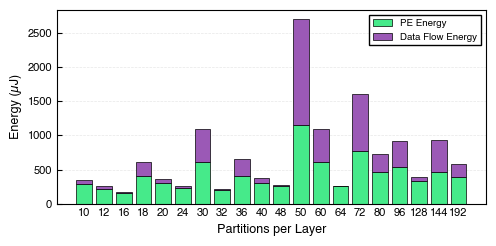

In [131]:
# Generate the energy breakdown bar plot
fig, ax = plot_energy_breakdown_ieee(
    csv_path=data_energy,
    figsize=(5.0, 2.5),  # Same width as latency plot
    save_path='../data/energy_breakdown_8x8.png',
    dpi=800,
    min_parts_per_layer=10  # Only show results for 8+ partitions per layer
)

plt.show()

Filtering: showing only parts_per_layer >= 10
Original data: 108 rows
After filtering duplicates and applying min filter: 21 rows
Figure saved to: ../data/energy_breakdown_12x12.png

Energy Statistics:
  Min total energy: 197.91 µJ
  Max total energy: 1863.03 µJ
  Min data flow energy %: 13.1%
  Max data flow energy %: 64.8%
  Mean data flow energy %: 36.9%

Data flow energy percentage trend:
  10 parts/layer: 32.8% data flow energy
  12 parts/layer: 18.4% data flow energy
  16 parts/layer: 18.4% data flow energy
  18 parts/layer: 52.1% data flow energy
  20 parts/layer: 30.7% data flow energy
  24 parts/layer: 17.2% data flow energy
  30 parts/layer: 57.6% data flow energy
  32 parts/layer: 13.1% data flow energy
  36 parts/layer: 43.6% data flow energy
  40 parts/layer: 25.4% data flow energy
  48 parts/layer: 17.0% data flow energy
  60 parts/layer: 62.2% data flow energy
  64 parts/layer: 16.8% data flow energy
  72 parts/layer: 53.1% data flow energy
  80 parts/layer: 27.0% data f

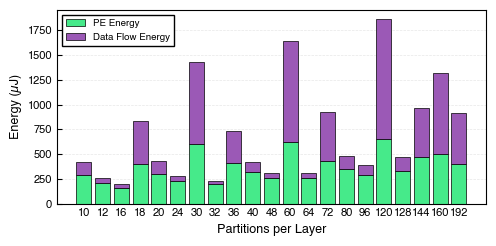

In [132]:
# Generate the energy breakdown bar plot
fig, ax = plot_energy_breakdown_ieee(
    csv_path=data_energy_12x12,
    figsize=(5.0, 2.5),  # Same width as latency plot
    save_path='../data/energy_breakdown_12x12.png',
    dpi=800,
    min_parts_per_layer=10  # Only show results for 8+ partitions per layer
)

plt.show()

In [ ]:
def plot_max_packet_delay_ieee(csv_path, figsize=(5.0, 2.5), save_path=None, dpi=300, min_parts_per_layer=None):
    """
    Create IEEE conference paper style bar plot for maximum packet delay.
    
    Shows how maximum packet delay changes with partitioning strategy.
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file with latency/energy results
    figsize : tuple
        Figure size in inches (default: 5.0x2.5 for wider plot)
    save_path : str, optional
        Path to save the figure (if None, only displays)
    dpi : int
        Resolution for saved figure (default: 300)
    min_parts_per_layer : int, optional
        Minimum number of partitions per layer to include in plot (filters out smaller values)
    
    Returns:
    --------
    fig, ax : matplotlib objects
    """
    
    # Set Helvetica font and IEEE style parameters
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'Arial'],
        'font.size': 8,
        'axes.labelsize': 9,
        'axes.titlesize': 9,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'legend.fontsize': 7,
        'figure.titlesize': 10,
        'axes.linewidth': 0.8,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
    })
    
    # Read data
    df = pd.read_csv(csv_path)
    
    # For duplicate parts_per_layer, keep only the one with smallest overall_latency_cycles
    df_filtered = df.loc[df.groupby('parts_per_layer')['overall_latency_cycles'].idxmin()]
    
    # Apply minimum partitions filter if specified
    if min_parts_per_layer is not None:
        df_filtered = df_filtered[df_filtered['parts_per_layer'] >= min_parts_per_layer]
        print(f"Filtering: showing only parts_per_layer >= {min_parts_per_layer}")
    
    # Sort by parts_per_layer
    df_sorted = df_filtered.sort_values('parts_per_layer')
    
    print(f"Original data: {len(df)} rows")
    print(f"After filtering duplicates and applying min filter: {len(df_sorted)} rows")
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    
    x_positions = range(len(df_sorted))
    bar_width = 0.8
    
    # Color - using orange for packet delay
    color_delay = "#F49A4B"  # Orange for max packet delay
    
    # Plot bars
    bars = ax.bar(x_positions, df_sorted['max_delay_packets_cycles'], 
                  width=bar_width,
                  color=color_delay, label='Max Packet Delay', 
                  edgecolor='black', linewidth=0.5, zorder=2)
    
    # Set labels and formatting
    ax.set_xlabel('Partitions per Layer', fontweight='normal')
    ax.set_ylabel('Max Packet Delay (cycles)', fontweight='normal')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df_sorted['parts_per_layer'].astype(int), rotation=0)
    
    # Add horizontal grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.3, zorder=0)
    ax.set_axisbelow(True)
    
    # Ticks inside
    ax.tick_params(axis='both', direction='in')
    
    # Make top spine visible without ticks
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.tick_params(top=False, right=False)
    
    # Add legend - fully opaque
    #ax.legend(loc='best', frameon=True, framealpha=1.0, 
    #         edgecolor='black', fancybox=False, facecolor='white')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    # Print statistics
    print(f"\nMax Packet Delay Statistics:")
    print(f"  Min max delay: {df_sorted['max_delay_packets_cycles'].min():.0f} cycles")
    print(f"  Max max delay: {df_sorted['max_delay_packets_cycles'].max():.0f} cycles")
    print(f"  Mean max delay: {df_sorted['max_delay_packets_cycles'].mean():.0f} cycles")
    print(f"\nMax packet delay trend:")
    for idx, row in df_sorted.iterrows():
        print(f"  {int(row['parts_per_layer'])} parts/layer: {row['max_delay_packets_cycles']:.0f} cycles")
    
    return fig, ax

Filtering: showing only parts_per_layer >= 10
Original data: 106 rows
After filtering duplicates and applying min filter: 20 rows
Figure saved to: ../data/max_packet_delay_8x8.png

Max Packet Delay Statistics:
  Min max delay: 1519 cycles
  Max max delay: 14015 cycles
  Mean max delay: 4902 cycles

Max packet delay trend:
  10 parts/layer: 4757 cycles
  12 parts/layer: 2421 cycles
  16 parts/layer: 1999 cycles
  18 parts/layer: 8518 cycles
  20 parts/layer: 3717 cycles
  24 parts/layer: 1898 cycles
  30 parts/layer: 9019 cycles
  32 parts/layer: 1776 cycles
  36 parts/layer: 5016 cycles
  40 parts/layer: 9088 cycles
  48 parts/layer: 1544 cycles
  50 parts/layer: 14015 cycles
  60 parts/layer: 7660 cycles
  64 parts/layer: 1519 cycles
  72 parts/layer: 5981 cycles
  80 parts/layer: 3640 cycles
  96 parts/layer: 6914 cycles
  128 parts/layer: 2462 cycles
  144 parts/layer: 2956 cycles
  192 parts/layer: 3137 cycles


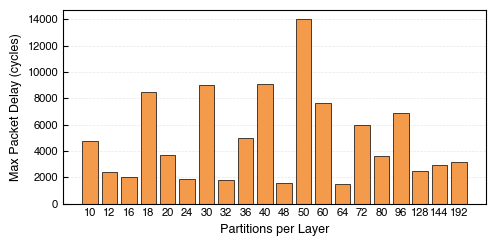

In [134]:
# Generate the max packet delay plot for 8x8 grid
fig, ax = plot_max_packet_delay_ieee(
    csv_path=data_energy,
    figsize=(5.0, 2.5),
    save_path='../data/max_packet_delay_8x8.png',
    dpi=800,
    min_parts_per_layer=10
)

plt.show()

Filtering: showing only parts_per_layer >= 10
Original data: 108 rows
After filtering duplicates and applying min filter: 21 rows
Figure saved to: ../data/max_packet_delay_12x12.png

Max Packet Delay Statistics:
  Min max delay: 1372 cycles
  Max max delay: 10349 cycles
  Mean max delay: 3940 cycles

Max packet delay trend:
  10 parts/layer: 6229 cycles
  12 parts/layer: 2226 cycles
  16 parts/layer: 1372 cycles
  18 parts/layer: 9660 cycles
  20 parts/layer: 4647 cycles
  24 parts/layer: 1855 cycles
  30 parts/layer: 10349 cycles
  32 parts/layer: 1424 cycles
  36 parts/layer: 6099 cycles
  40 parts/layer: 2669 cycles
  48 parts/layer: 2004 cycles
  60 parts/layer: 8268 cycles
  64 parts/layer: 1590 cycles
  72 parts/layer: 5144 cycles
  80 parts/layer: 1596 cycles
  96 parts/layer: 5625 cycles
  120 parts/layer: 4190 cycles
  128 parts/layer: 1400 cycles
  144 parts/layer: 2205 cycles
  160 parts/layer: 2082 cycles
  192 parts/layer: 2104 cycles


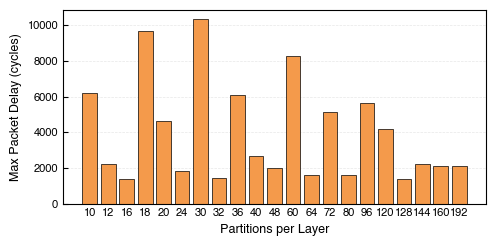

In [135]:
# Generate the max packet delay plot for 12x12 grid
fig, ax = plot_max_packet_delay_ieee(
    csv_path=data_energy_12x12,
    figsize=(5.0, 2.5),
    save_path='../data/max_packet_delay_12x12.png',
    dpi=800,
    min_parts_per_layer=10
)

plt.show()

In [138]:
def plot_avg_packet_size_ieee(csv_path, figsize=(5.0, 2.5), save_path=None, dpi=300, min_parts_per_layer=None):
    """
    Create IEEE conference paper style bar plot for maximum packet delay.
    
    Shows how maximum packet delay changes with partitioning strategy.
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file with latency/energy results
    figsize : tuple
        Figure size in inches (default: 5.0x2.5 for wider plot)
    save_path : str, optional
        Path to save the figure (if None, only displays)
    dpi : int
        Resolution for saved figure (default: 300)
    min_parts_per_layer : int, optional
        Minimum number of partitions per layer to include in plot (filters out smaller values)
    
    Returns:
    --------
    fig, ax : matplotlib objects
    """
    
    # Set Helvetica font and IEEE style parameters
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'Arial'],
        'font.size': 8,
        'axes.labelsize': 9,
        'axes.titlesize': 9,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'legend.fontsize': 7,
        'figure.titlesize': 10,
        'axes.linewidth': 0.8,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
    })
    
    # Read data
    df = pd.read_csv(csv_path)
    
    # For duplicate parts_per_layer, keep only the one with smallest overall_latency_cycles
    df_filtered = df.loc[df.groupby('parts_per_layer')['overall_latency_cycles'].idxmin()]
    
    # Apply minimum partitions filter if specified
    if min_parts_per_layer is not None:
        df_filtered = df_filtered[df_filtered['parts_per_layer'] >= min_parts_per_layer]
        print(f"Filtering: showing only parts_per_layer >= {min_parts_per_layer}")
    
    # Sort by parts_per_layer
    df_sorted = df_filtered.sort_values('parts_per_layer')
    
    print(f"Original data: {len(df)} rows")
    print(f"After filtering duplicates and applying min filter: {len(df_sorted)} rows")
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    
    x_positions = range(len(df_sorted))
    bar_width = 0.8
    
    # Color - using orange for packet delay
    color_delay = "#6050EE"  # Orange for max packet delay
    
    # Plot bars
    bars = ax.bar(x_positions, df_sorted['avg_packet_size_bytes'], 
                  width=bar_width,
                  color=color_delay, label='Avg Packet Size', 
                  edgecolor='black', linewidth=0.5, zorder=2)
    
    # Set labels and formatting
    ax.set_xlabel('Partitions per Layer', fontweight='normal')
    ax.set_ylabel('Avg Packet Size (B)', fontweight='normal')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df_sorted['parts_per_layer'].astype(int), rotation=0)
    
    # Add horizontal grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.3, zorder=0)
    ax.set_axisbelow(True)
    
    # Ticks inside
    ax.tick_params(axis='both', direction='in')
    
    # Make top spine visible without ticks
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.tick_params(top=False, right=False)
    
    # Add legend - fully opaque
    #ax.legend(loc='best', frameon=True, framealpha=1.0, 
    #         edgecolor='black', fancybox=False, facecolor='white')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    # Print statistics
    print(f"\nAvg Packet Size Statistics:")
    print(f"  Min max delay: {df_sorted['avg_packet_size_bytes'].min():.0f} Bytes")
    print(f"  Max max delay: {df_sorted['avg_packet_size_bytes'].max():.0f} Bytes")
    print(f"  Mean max delay: {df_sorted['avg_packet_size_bytes'].mean():.0f} Bytes")
    print(f"\nAvg packet size trend:")
    for idx, row in df_sorted.iterrows():
        print(f"  {int(row['parts_per_layer'])} parts/layer: {row['avg_packet_size_bytes']:.0f} bytes")
    
    return fig, ax

Filtering: showing only parts_per_layer >= 10
Original data: 108 rows
After filtering duplicates and applying min filter: 21 rows
Figure saved to: ../data/avg_packet_size_12x12.png

Avg Packet Size Statistics:
  Min max delay: 16 Bytes
  Max max delay: 310 Bytes
  Mean max delay: 80 Bytes

Avg packet size trend:
  10 parts/layer: 310 bytes
  12 parts/layer: 174 bytes
  16 parts/layer: 107 bytes
  18 parts/layer: 239 bytes
  20 parts/layer: 106 bytes
  24 parts/layer: 81 bytes
  30 parts/layer: 158 bytes
  32 parts/layer: 57 bytes
  36 parts/layer: 82 bytes
  40 parts/layer: 51 bytes
  48 parts/layer: 39 bytes
  60 parts/layer: 56 bytes
  64 parts/layer: 31 bytes
  72 parts/layer: 40 bytes
  80 parts/layer: 26 bytes
  96 parts/layer: 23 bytes
  120 parts/layer: 28 bytes
  128 parts/layer: 20 bytes
  144 parts/layer: 20 bytes
  160 parts/layer: 18 bytes
  192 parts/layer: 16 bytes


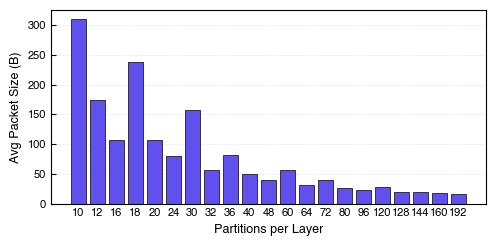

In [139]:
# Generate the max packet delay plot for 12x12 grid
fig, ax = plot_avg_packet_size_ieee(
    csv_path=data_energy_12x12,
    figsize=(5.0, 2.5),
    save_path='../data/avg_packet_size_12x12.png',
    dpi=800,
    min_parts_per_layer=10
)

plt.show()

### Above combined into one plot

In [162]:
def plot_packet_delay_and_size_combined_ieee(csv_path, figsize=(5.0, 2.5), save_path=None, dpi=300, min_parts_per_layer=None):
    """
    Create IEEE conference paper style grouped bar plot combining max packet delay and avg packet size.
    
    Shows max packet delay and average packet size side-by-side with dual y-axes.
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file with latency/energy results
    figsize : tuple
        Figure size in inches (default: 5.0x2.5 for wider plot)
    save_path : str, optional
        Path to save the figure (if None, only displays)
    dpi : int
        Resolution for saved figure (default: 300)
    min_parts_per_layer : int, optional
        Minimum number of partitions per layer to include in plot (filters out smaller values)
    
    Returns:
    --------
    fig, ax1, ax2 : matplotlib objects
    """
    
    # Set Helvetica font and IEEE style parameters
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'Arial'],
        'font.size': 8,
        'axes.labelsize': 9,
        'axes.titlesize': 9,
        'xtick.labelsize': 7,
        'ytick.labelsize': 8,
        'legend.fontsize': 7,
        'figure.titlesize': 10,
        'axes.linewidth': 0.8,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
    })
    
    # Read data
    df = pd.read_csv(csv_path)
    
    # For duplicate parts_per_layer, keep only the one with smallest overall_latency_cycles
    df_filtered = df.loc[df.groupby('parts_per_layer')['overall_latency_cycles'].idxmin()]
    
    # Apply minimum partitions filter if specified
    if min_parts_per_layer is not None:
        df_filtered = df_filtered[df_filtered['parts_per_layer'] >= min_parts_per_layer]
        print(f"Filtering: showing only parts_per_layer >= {min_parts_per_layer}")
    
    # Sort by parts_per_layer
    df_sorted = df_filtered.sort_values('parts_per_layer')
    
    print(f"Original data: {len(df)} rows")
    print(f"After filtering duplicates and applying min filter: {len(df_sorted)} rows")
    
    # Create figure with dual y-axes
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    
    # Set up grouped bars
    x_positions = np.arange(len(df_sorted))
    bar_width = 0.35
    
    # Colors for the two metrics
    color_delay = "#F49A4B"  # Orange for max packet delay
    color_size = "#6050EE"   # Purple for avg packet size
    
    # Plot max packet delay on left y-axis (Y1)
    bars1 = ax1.bar(x_positions - bar_width/2, df_sorted['max_delay_packets_cycles'].values, 
                    width=bar_width,
                    color=color_delay, label='Max Packet Delay', 
                    edgecolor='black', linewidth=0.5, zorder=2)
    
    ax1.set_xlabel('Partitions per Layer', fontweight='normal')
    ax1.set_ylabel('Max Packet Delay (cycles)', fontweight='normal')
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(df_sorted['parts_per_layer'].astype(int).values, rotation=0)
    ax1.tick_params(axis='y', direction='in')
    ax1.tick_params(axis='x', direction='in')
    
    # Add horizontal grid
    ax1.grid(True, axis='y', linestyle='--', alpha=0.3, zorder=0)
    ax1.set_axisbelow(True)
    
    # Create second y-axis for avg packet size (Y2)
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_positions + bar_width/2, df_sorted['avg_packet_size_bytes'].values, 
                    width=bar_width,
                    color=color_size, label='Average Packet Size', 
                    edgecolor='black', linewidth=0.5, zorder=2)
    
    ax2.set_ylabel('Average Packet Size (B)', fontweight='normal')
    ax2.tick_params(axis='y', direction='in')
    
    # Make top spine visible without ticks
    ax1.spines['top'].set_visible(True)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    
    # Remove ticks from top axis
    ax1.tick_params(top=False, labeltop=False)
    ax2.tick_params(top=False, labeltop=False)
    
    # Add combined legend - fully opaque
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
              loc='best', frameon=True, framealpha=1.0, 
              edgecolor='black', fancybox=False, facecolor='white')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    # Print statistics
    print(f"\nMax Packet Delay Statistics:")
    print(f"  Min: {df_sorted['max_delay_packets_cycles'].min():.0f} cycles")
    print(f"  Max: {df_sorted['max_delay_packets_cycles'].max():.0f} cycles")
    print(f"  Mean: {df_sorted['max_delay_packets_cycles'].mean():.0f} cycles")
    
    print(f"\nAverage Packet Size Statistics:")
    print(f"  Min: {df_sorted['avg_packet_size_bytes'].min():.0f} B")
    print(f"  Max: {df_sorted['avg_packet_size_bytes'].max():.0f} B")
    print(f"  Mean: {df_sorted['avg_packet_size_bytes'].mean():.0f} B")
    
    print(f"\nCombined trend:")
    for idx, row in df_sorted.iterrows():
        print(f"  {int(row['parts_per_layer'])} parts/layer: "
              f"delay={row['max_delay_packets_cycles']:.0f} cycles, "
              f"size={row['avg_packet_size_bytes']:.0f} B")
    
    return fig, ax1, ax2

Filtering: showing only parts_per_layer >= 10
Original data: 106 rows
After filtering duplicates and applying min filter: 20 rows
Figure saved to: ../data/max_delay_and_avg_packet_size_8x8.png

Max Packet Delay Statistics:
  Min: 1519 cycles
  Max: 14015 cycles
  Mean: 4902 cycles

Average Packet Size Statistics:
  Min: 15 B
  Max: 310 B
  Mean: 89 B

Combined trend:
  10 parts/layer: delay=4757 cycles, size=310 B
  12 parts/layer: delay=2421 cycles, size=174 B
  16 parts/layer: delay=1999 cycles, size=96 B
  18 parts/layer: delay=8518 cycles, size=239 B
  20 parts/layer: delay=3717 cycles, size=106 B
  24 parts/layer: delay=1898 cycles, size=81 B
  30 parts/layer: delay=9019 cycles, size=158 B
  32 parts/layer: delay=1776 cycles, size=52 B
  36 parts/layer: delay=5016 cycles, size=83 B
  40 parts/layer: delay=9088 cycles, size=52 B
  48 parts/layer: delay=1544 cycles, size=38 B
  50 parts/layer: delay=14015 cycles, size=142 B
  60 parts/layer: delay=7660 cycles, size=55 B
  64 parts/l

ValueError: too many values to unpack (expected 2)

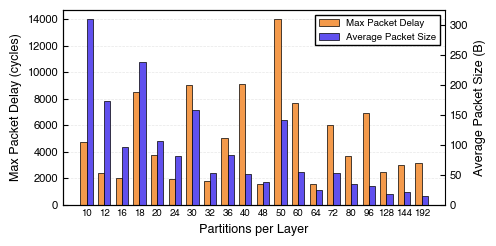

In [163]:
# Generate the max packet delay plot for 12x12 grid
fig, ax = plot_packet_delay_and_size_combined_ieee(
    csv_path=data_energy,
    figsize=(5.0, 2.5),
    save_path='../data/max_delay_and_avg_packet_size_8x8.png',
    dpi=500,
    min_parts_per_layer=10
)

plt.show()

Filtering: showing only parts_per_layer >= 10
Original data: 108 rows
After filtering duplicates and applying min filter: 21 rows
Figure saved to: ../data/max_delay_and_avg_packet_size_12x12.png

Max Packet Delay Statistics:
  Min: 1372 cycles
  Max: 10349 cycles
  Mean: 3940 cycles

Average Packet Size Statistics:
  Min: 16 B
  Max: 310 B
  Mean: 80 B

Combined trend:
  10 parts/layer: delay=6229 cycles, size=310 B
  12 parts/layer: delay=2226 cycles, size=174 B
  16 parts/layer: delay=1372 cycles, size=107 B
  18 parts/layer: delay=9660 cycles, size=239 B
  20 parts/layer: delay=4647 cycles, size=106 B
  24 parts/layer: delay=1855 cycles, size=81 B
  30 parts/layer: delay=10349 cycles, size=158 B
  32 parts/layer: delay=1424 cycles, size=57 B
  36 parts/layer: delay=6099 cycles, size=82 B
  40 parts/layer: delay=2669 cycles, size=51 B
  48 parts/layer: delay=2004 cycles, size=39 B
  60 parts/layer: delay=8268 cycles, size=56 B
  64 parts/layer: delay=1590 cycles, size=31 B
  72 parts

ValueError: too many values to unpack (expected 2)

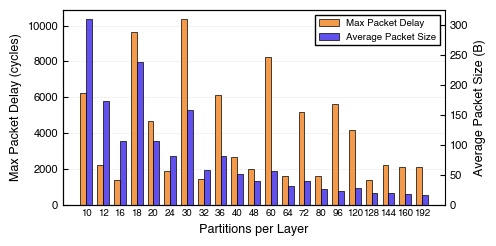

In [164]:
# Generate the max packet delay plot for 12x12 grid
fig, ax = plot_packet_delay_and_size_combined_ieee(
    csv_path=data_energy_12x12,
    figsize=(5.0, 2.5),
    save_path='../data/max_delay_and_avg_packet_size_12x12.png',
    dpi=500,
    min_parts_per_layer=10
)

plt.show()

In [146]:
def plot_parallel_computations_ieee(csv_path, figsize=(5.0, 2.5), save_path=None, dpi=300, min_parts_per_layer=None, max_parallel_ref=None):
    """
    Create IEEE conference paper style grouped bar plot for parallel computations.
    
    Shows max and average parallel computations as percentages side-by-side for each partition level.
    
    Parameters:
    -----------
    csv_path : str
        Path to the CSV file with latency/energy results
    figsize : tuple
        Figure size in inches (default: 5.0x2.5 for wider plot)
    save_path : str, optional
        Path to save the figure (if None, only displays)
    dpi : int
        Resolution for saved figure (default: 300)
    min_parts_per_layer : int, optional
        Minimum number of partitions per layer to include in plot (filters out smaller values)
    max_parallel_ref : int, optional
        Reference value for 100% parallelism (e.g., 144 PEs = 100%)
        If None, uses the maximum value found in data
    
    Returns:
    --------
    fig, ax : matplotlib objects
    """
    
    # Set Helvetica font and IEEE style parameters
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'Arial'],
        'font.size': 8,
        'axes.labelsize': 9,
        'axes.titlesize': 9,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'legend.fontsize': 7,
        'figure.titlesize': 10,
        'axes.linewidth': 0.8,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
    })
    
    # Read data
    df = pd.read_csv(csv_path)
    
    # For duplicate parts_per_layer, keep only the one with smallest overall_latency_cycles
    df_filtered = df.loc[df.groupby('parts_per_layer')['overall_latency_cycles'].idxmin()]
    
    # Apply minimum partitions filter if specified
    if min_parts_per_layer is not None:
        df_filtered = df_filtered[df_filtered['parts_per_layer'] >= min_parts_per_layer]
        print(f"Filtering: showing only parts_per_layer >= {min_parts_per_layer}")
    
    # Sort by parts_per_layer
    df_sorted = df_filtered.sort_values('parts_per_layer')
    
    print(f"Original data: {len(df)} rows")
    print(f"After filtering duplicates and applying min filter: {len(df_sorted)} rows")
    
    # Determine reference value for 100%
    if max_parallel_ref is None:
        max_parallel_ref = df_sorted['max_parallel_computations'].max()
        print(f"Using max value in data as 100% reference: {max_parallel_ref:.1f}")
    else:
        print(f"Using user-specified 100% reference: {max_parallel_ref}")
    
    # Convert to percentages
    df_sorted = df_sorted.copy()
    df_sorted['max_parallel_pct'] = (df_sorted['max_parallel_computations'] / max_parallel_ref) * 100
    df_sorted['avg_parallel_pct'] = (df_sorted['avg_parallel_computations'] / max_parallel_ref) * 100
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    
    # Set up grouped bars
    x_positions = np.arange(len(df_sorted))
    bar_width = 0.35
    
    # Colors for the two bars
    color_max = '#3498DB'  # Blue for max parallel
    color_avg = '#E74C3C'  # Red for avg parallel
    
    # Plot grouped bars with percentages
    bars1 = ax.bar(x_positions - bar_width/2, df_sorted['max_parallel_pct'], 
                   width=bar_width,
                   color=color_max, label='Max', 
                   edgecolor='black', linewidth=0.5, zorder=2)
    
    bars2 = ax.bar(x_positions + bar_width/2, df_sorted['avg_parallel_pct'], 
                   width=bar_width,
                   color=color_avg, label='Average', 
                   edgecolor='black', linewidth=0.5, zorder=2)
    
    # Set labels and formatting
    ax.set_xlabel('Partitions per Layer', fontweight='normal')
    ax.set_ylabel('Parallel Computations (%)', fontweight='normal')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(df_sorted['parts_per_layer'].astype(int), rotation=0)
    
    # Add horizontal grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.3, zorder=0)
    ax.set_axisbelow(True)
    
    # Ticks inside
    ax.tick_params(axis='both', direction='in')
    
    # Make top spine visible without ticks
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.tick_params(top=False, right=False)
    
    # Add legend - fully opaque
    ax.legend(loc='best', frameon=True, framealpha=1.0, 
              edgecolor='black', fancybox=False, facecolor='white')
    
    # Tight layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"Figure saved to: {save_path}")
    
    # Print statistics
    print(f"\nParallel Computations Statistics (100% = {max_parallel_ref}):")
    print(f"  Max parallel - range: {df_sorted['max_parallel_pct'].min():.1f}% to {df_sorted['max_parallel_pct'].max():.1f}%")
    print(f"  Avg parallel - range: {df_sorted['avg_parallel_pct'].min():.1f}% to {df_sorted['avg_parallel_pct'].max():.1f}%")
    print(f"\nParallel computations trend:")
    for idx, row in df_sorted.iterrows():
        print(f"  {int(row['parts_per_layer'])} parts/layer: max={row['max_parallel_pct']:.1f}% ({row['max_parallel_computations']:.0f}), avg={row['avg_parallel_pct']:.1f}% ({row['avg_parallel_computations']:.1f})")
    
    return fig, ax

Filtering: showing only parts_per_layer >= 10
Original data: 106 rows
After filtering duplicates and applying min filter: 20 rows
Using max value in data as 100% reference: 64.0
Figure saved to: ../data/parallel_computations_8x8.png

Parallel Computations Statistics (100% = 64):
  Max parallel - range: 15.6% to 100.0%
  Avg parallel - range: 12.3% to 76.4%

Parallel computations trend:
  10 parts/layer: max=15.6% (10), avg=12.3% (7.8)
  12 parts/layer: max=18.8% (12), avg=16.4% (10.5)
  16 parts/layer: max=25.0% (16), avg=24.9% (16.0)
  18 parts/layer: max=28.1% (18), avg=21.3% (13.6)
  20 parts/layer: max=31.2% (20), avg=24.2% (15.5)
  24 parts/layer: max=37.5% (24), avg=32.8% (21.0)
  30 parts/layer: max=46.9% (30), avg=30.7% (19.6)
  32 parts/layer: max=50.0% (32), avg=49.3% (31.6)
  36 parts/layer: max=56.2% (36), avg=41.5% (26.6)
  40 parts/layer: max=62.5% (40), avg=47.9% (30.7)
  48 parts/layer: max=75.0% (48), avg=56.0% (35.9)
  50 parts/layer: max=78.1% (50), avg=35.5% (22.7)


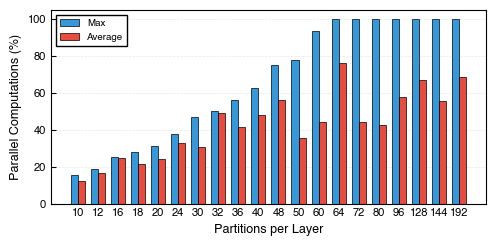

In [147]:
# Generate the parallel computations plot for 8x8 grid
fig, ax = plot_parallel_computations_ieee(
    csv_path=data_energy,
    figsize=(5.0, 2.5),
    save_path='../data/parallel_computations_8x8.png',
    dpi=800,
    min_parts_per_layer=10
)

plt.show()

Filtering: showing only parts_per_layer >= 10
Original data: 108 rows
After filtering duplicates and applying min filter: 21 rows
Using max value in data as 100% reference: 144.0
Figure saved to: ../data/parallel_computations_12x12.png

Parallel Computations Statistics (100% = 144):
  Max parallel - range: 6.9% to 100.0%
  Avg parallel - range: 5.5% to 55.6%

Parallel computations trend:
  10 parts/layer: max=6.9% (10), avg=5.5% (7.9)
  12 parts/layer: max=8.3% (12), avg=7.4% (10.6)
  16 parts/layer: max=11.1% (16), avg=10.9% (15.7)
  18 parts/layer: max=12.5% (18), avg=9.3% (13.5)
  20 parts/layer: max=13.9% (20), avg=10.8% (15.5)
  24 parts/layer: max=16.7% (24), avg=14.5% (21.0)
  30 parts/layer: max=20.8% (30), avg=13.4% (19.3)
  32 parts/layer: max=22.2% (32), avg=21.7% (31.2)
  36 parts/layer: max=25.0% (36), avg=18.6% (26.8)
  40 parts/layer: max=27.8% (40), avg=21.3% (30.7)
  48 parts/layer: max=33.3% (48), avg=28.9% (41.6)
  60 parts/layer: max=41.7% (60), avg=26.4% (38.0)
  6

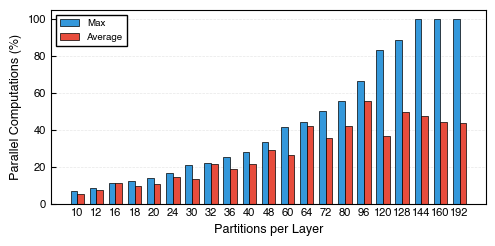

In [148]:
# Generate the parallel computations plot for 12x12 grid
fig, ax = plot_parallel_computations_ieee(
    csv_path=data_energy_12x12,
    figsize=(5.0, 2.5),
    save_path='../data/parallel_computations_12x12.png',
    dpi=800,
    min_parts_per_layer=10
)

plt.show()